<a href="https://colab.research.google.com/github/Sitraka17/Churn/blob/main/Custormer_CHRUN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Jetro

In [ ]:
#Python to CUSTOMER CHURN

In [80]:
#IMPORT CELL
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [81]:
#Load the data 
from google.colab import files # Use to load data on Google Colab 
uploaded = files.upload() # Use to load data on Google Colab 

Saving Dashbaord Jetro (1).xlsx to Dashbaord Jetro (1) (1).xlsx


In [110]:
#Load the data into the data frame
df = pd.read_excel('Dashbaord Jetro (1).xlsx')
df.head(7)

,Portal & REF,Portal,Ref fiche,Online since,Company name,Data collection date / per month,Month,URL statco,Online stand URL,Main category,Portal&MainCat,Number of product pages,View\ndisplay,Click,STAND\n CONTENT HIGHLIGHT\nDisplay,STAND\n CONTENT HIGHLIGHT\nClick,ADVERTISEMENT\nDisplay,ADVERTISEMENT\nClick,Sourcing & Website Traffic\nSearch Results page prospects,Sourcing & Website Traffic\nClick Throughs,Unique Visitor\nstand prospect,See\n Price Options/Where to Buy Prospects,Requests,RFQ\nList of my request for quotation,,.1,.2,.3,.4,.5,.6
0,AE133867,AE,133867,2021-02-11,USTECH CORPORATION,2021-02-28,2,https://secure.archiexpo.com/statsco-backoffic...,https://www.archiexpo.com/prod/ustech-corporat...,Bathroom,AE-Bathroom,3,9810,205,0.0,0.0,2334,1,61,2,13,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AE133867,AE,133867,2021-02-11,USTECH CORPORATION,2021-03-16,3,https://secure.archiexpo.com/statsco-backoffic...,https://www.archiexpo.com/prod/ustech-corporat...,Bathroom,AE-Bathroom,3,2825,82,0.0,0.0,5684,13,57,3,6,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AE162535,AE,162535,2020-12-01,O.N. Industries Ltd.,2020-12-31,12,https://secure.archiexpo.com/statsco-backoffic...,https://www.archiexpo.com/prod/industries-ltd-...,Planting and accessories,AE-Planting and accessories,2,8183,49,0.0,0.0,1972,3,0,2,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AE162535,AE,162535,2020-12-01,O.N. Industries Ltd.,2021-01-31,1,https://secure.archiexpo.com/statsco-backoffic...,https://www.archiexpo.com/prod/industries-ltd-...,Planting and accessories,AE-Planting and accessories,2,7735,36,72433.0,75.0,4119,7,3,4,64,3,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AE162535,AE,162535,2020-12-01,O.N. Industries Ltd.,2021-02-28,2,https://secure.archiexpo.com/statsco-backoffic...,https://www.archiexpo.com/prod/industries-ltd-...,Planting and accessories,AE-Planting and accessories,2,170,9,4702.0,2.0,3504,6,0,2,1,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AE162535,AE,162535,2020-12-01,O.N. Industries Ltd.,2021-03-16,3,https://secure.archiexpo.com/statsco-backoffic...,https://www.archiexpo.com/prod/industries-ltd-...,Planting and accessories,AE-Planting and accessories,2,-32,17,206213.0,536.0,16,1,3,15,195,0,11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AE167235,AE,167235,2020-12-07,Conde House,2020-12-31,12,https://secure.archiexpo.com/statsco-backoffic...,https://www.archiexpo.com/prod/conde-house-167...,Tables,AE-Tables,54,18892,214,0.0,0.0,18078,14,269,7,15,0,10,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Graphs of df

In [90]:
import plotly.express as px
fig = px.line(df, 'Portal', 'Click', title='Nombres de clicks par portails ')
fig.show() 

In [91]:
import plotly.express as px
fig = px.line(df, 'Portal', 'Click', title='Nb de clicks par portails et stands',color='Ref fiche')
fig.show() 

In [95]:
fig = px.scatter_matrix(df, dimensions=["Month", "View\ndisplay ",	"Click"], color="Company name")
fig.show()

### Data cleaning

In [97]:
df.shape #Show all of the columns x rows
#207 clients and 31 columns per client... ?

(207, 31)

In [98]:
#Show all of the column names
df.columns.values

array(['Portal & REF', 'Portal', 'Ref fiche', 'Online since',
       'Company name', 'Data collection date / per month', 'Month',
       'URL statco', 'Online stand URL', 'Main category',
       'Portal&MainCat', 'Number of product pages', 'View\ndisplay ',
       'Click', 'STAND\n CONTENT HIGHLIGHT\nDisplay',
       'STAND\n CONTENT HIGHLIGHT\nClick', 'ADVERTISEMENT\nDisplay',
       'ADVERTISEMENT\nClick',
       'Sourcing & Website Traffic\nSearch Results page prospects',
       'Sourcing & Website Traffic\nClick Throughs',
       'Unique Visitor\nstand prospect',
       'See\n Price Options/Where to Buy Prospects', 'Requests',
       'RFQ\nList of my request for quotation', ' ', ' .1', ' .2', ' .3',
       ' .4', ' .5', ' .6'], dtype=object)

In [99]:
#Check for NA or missing data
df.isna().sum()

Portal & REF                                                   0
Portal                                                         0
Ref fiche                                                      0
Online since                                                   0
Company name                                                   0
Data collection date / per month                               0
Month                                                          0
URL statco                                                     0
Online stand URL                                               0
Main category                                                  0
Portal&MainCat                                                 0
Number of product pages                                        0
View\ndisplay                                                  0
Click                                                          0
STAND\n CONTENT HIGHLIGHT\nDisplay                             1
STAND\n CONTENT HIGHLIGHT

In [100]:
df.dropna()
JETRO=df.dropna(axis='columns') #dropped all the empty columns ! 

In [ ]:
#Show statistics on the current data 
df.dropna(axis='columns') #dropped all the empty columns ! 
JETRO.describe()

,Ref fiche,Month,Number of product pages,View\ndisplay,Click,ADVERTISEMENT\nDisplay,ADVERTISEMENT\nClick,Sourcing & Website Traffic\nSearch Results page prospects,Sourcing & Website Traffic\nClick Throughs,Unique Visitor\nstand prospect,See\n Price Options/Where to Buy Prospects,Requests
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,194782.004831,3.584541,14.140097,6658.405797,121.333333,5965.178744,12.173913,253.946860,8.724638,77.048309,0.932367,4.444444
std,49941.238037,3.402077,19.983845,14457.229222,434.224764,11368.048720,28.584209,2762.627658,17.502747,170.778479,7.541166,10.863922
min,27720.000000,1.000000,1.000000,-32.000000,0.000000,-7464.000000,-14.000000,-17.000000,-22.000000,0.000000,0.000000,-2.000000
25%,167301.000000,2.000000,3.000000,1232.000000,22.500000,1286.500000,2.000000,9.500000,2.000000,2.000000,0.000000,0.000000
50%,221570.000000,3.000000,6.000000,3324.000000,51.000000,3302.000000,6.000000,30.000000,5.000000,6.000000,0.000000,0.000000
75%,233755.000000,3.000000,18.000000,6777.500000,96.500000,6991.500000,14.000000,74.500000,10.000000,41.500000,0.000000,3.000000
max,234591.000000,12.000000,102.000000,176686.000000,4917.000000,136510.000000,370.000000,39770.000000,211.000000,1049.000000,89.000000,84.000000


In [ ]:
#Comments: 
# Max de vues 14 457 et min en <0 ?
# 50% ont 51 clicks et 75% ont 96 clicks 

In [ ]:
#Get the number of customers that churned
df['Click'].value_counts()

15     6
59     5
21     5
36     5
49     5
      ..
371    1
632    1
121    1
122    1
0      1
Name: Click, Length: 126, dtype: int64

In [ ]:
df.columns

Index(['Unemployment_Rate', 'Stock_Index_Price'], dtype='object')

In [ ]:
fig = px.line(df, ('Unique Visitor\nstand prospect', 1), ('Unique Visitor\nstand prospect', 2), title='Tentative ')
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


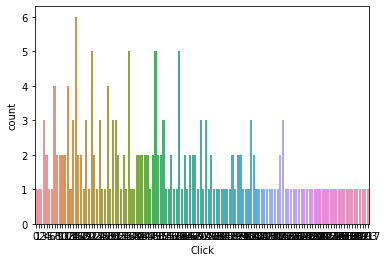

In [ ]:
#Visualize the count of customer churn
sns.countplot(df['Click'])

In [ ]:
#Visualize the churn count for the internet service ? TOO LONG.
#sns.countplot(x='Ref fiche', hue='Click', data = df)

# Statistics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
JETRO.describe()

,Ref fiche,Month,Number of product pages,View\ndisplay,Click,ADVERTISEMENT\nDisplay,ADVERTISEMENT\nClick,Sourcing & Website Traffic\nSearch Results page prospects,Sourcing & Website Traffic\nClick Throughs,Unique Visitor\nstand prospect,See\n Price Options/Where to Buy Prospects,Requests
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,194782.004831,3.584541,14.140097,6658.405797,121.333333,5965.178744,12.173913,253.946860,8.724638,77.048309,0.932367,4.444444
std,49941.238037,3.402077,19.983845,14457.229222,434.224764,11368.048720,28.584209,2762.627658,17.502747,170.778479,7.541166,10.863922
min,27720.000000,1.000000,1.000000,-32.000000,0.000000,-7464.000000,-14.000000,-17.000000,-22.000000,0.000000,0.000000,-2.000000
25%,167301.000000,2.000000,3.000000,1232.000000,22.500000,1286.500000,2.000000,9.500000,2.000000,2.000000,0.000000,0.000000
50%,221570.000000,3.000000,6.000000,3324.000000,51.000000,3302.000000,6.000000,30.000000,5.000000,6.000000,0.000000,0.000000
75%,233755.000000,3.000000,18.000000,6777.500000,96.500000,6991.500000,14.000000,74.500000,10.000000,41.500000,0.000000,3.000000
max,234591.000000,12.000000,102.000000,176686.000000,4917.000000,136510.000000,370.000000,39770.000000,211.000000,1049.000000,89.000000,84.000000


#Data
Jetro par Portail + Ref 

In [ ]:
data=JETRO.groupby(['Portal & REF']).mean()  #data est le groupby 

In [ ]:
data

,Ref fiche,Month,Number of product pages,View\ndisplay,Click,ADVERTISEMENT\nDisplay,ADVERTISEMENT\nClick,Sourcing & Website Traffic\nSearch Results page prospects,Sourcing & Website Traffic\nClick Throughs,Unique Visitor\nstand prospect,See\n Price Options/Where to Buy Prospects,Requests
Portal & REF,,,,,,,,,,,,
AE133867,133867.0,2.5,3.0,6317.50,143.50,4009.00,7.00,59.00,2.50,9.50,0.00,0.00
AE162535,162535.0,4.5,2.0,4014.00,27.75,2402.75,4.25,1.50,5.75,65.00,0.75,3.00
AE167235,167235.0,4.5,54.0,18386.00,225.50,23857.00,38.50,276.25,6.50,15.25,0.00,4.50
AE167236,167236.0,4.5,37.0,8994.50,90.00,16273.75,34.75,84.00,6.25,27.25,0.00,2.00
AE167299,167299.0,4.5,1.0,2603.50,46.00,7890.25,9.75,28.00,8.25,219.00,0.00,14.75
...,...,...,...,...,...,...,...,...,...,...,...,...
ME205006,205006.0,2.5,7.0,6743.50,81.00,7120.00,15.00,120.00,26.00,166.00,0.00,21.50
ME68996,68996.0,4.5,3.0,4184.25,53.25,7630.50,7.50,72.25,-0.25,47.75,0.00,1.00
ME70272,70272.0,4.5,5.0,6312.50,197.25,44871.50,117.50,10061.00,23.00,100.75,0.00,13.00


In [ ]:
import pandas as pd
import plotly.express as px

fig = px.line(data, x = 'Ref fiche', y = 'Unique Visitor\nstand prospect', title='Unique Visitor\nstand prospect by Stand')
fig.show() #C'est moche.

#Trying to plot

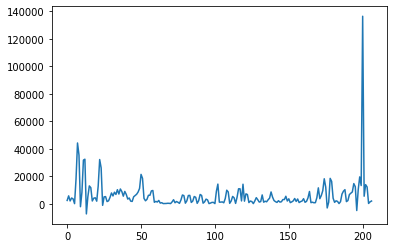

In [ ]:
JETRO['ADVERTISEMENT\nDisplay'].plot()
plt.show()

In [ ]:
JETRO.index

RangeIndex(start=0, stop=207, step=1)

In [ ]:
Jetro=JETRO.set_index('Portal & REF')
Jetro

,Portal,Ref fiche,Online since,Company name,Data collection date / per month,Month,URL statco,Online stand URL,Main category,Portal&MainCat,Number of product pages,View\ndisplay,Click,ADVERTISEMENT\nDisplay,ADVERTISEMENT\nClick,Sourcing & Website Traffic\nSearch Results page prospects,Sourcing & Website Traffic\nClick Throughs,Unique Visitor\nstand prospect,See\n Price Options/Where to Buy Prospects,Requests
Portal & REF,,,,,,,,,,,,,,,,,,,,
AE133867,AE,133867,2021-02-11,USTECH CORPORATION,2021-02-28,2,https://secure.archiexpo.com/statsco-backoffic...,https://www.archiexpo.com/prod/ustech-corporat...,Bathroom,AE-Bathroom,3,9810,205,2334,1,61,2,13,0,0
AE133867,AE,133867,2021-02-11,USTECH CORPORATION,2021-03-16,3,https://secure.archiexpo.com/statsco-backoffic...,https://www.archiexpo.com/prod/ustech-corporat...,Bathroom,AE-Bathroom,3,2825,82,5684,13,57,3,6,0,0
AE162535,AE,162535,2020-12-01,O.N. Industries Ltd.,2020-12-31,12,https://secure.archiexpo.com/statsco-backoffic...,https://www.archiexpo.com/prod/industries-ltd-...,Planting and accessories,AE-Planting and accessories,2,8183,49,1972,3,0,2,0,0,0
AE162535,AE,162535,2020-12-01,O.N. Industries Ltd.,2021-01-31,1,https://secure.archiexpo.com/statsco-backoffic...,https://www.archiexpo.com/prod/industries-ltd-...,Planting and accessories,AE-Planting and accessories,2,7735,36,4119,7,3,4,64,3,1
AE162535,AE,162535,2020-12-01,O.N. Industries Ltd.,2021-02-28,2,https://secure.archiexpo.com/statsco-backoffic...,https://www.archiexpo.com/prod/industries-ltd-...,Planting and accessories,AE-Planting and accessories,2,170,9,3504,6,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NE199051,NE,199051,2020-12-01,Asano-metal industry,2021-01-31,1,https://secure.nauticexpo.com/statsco-backoffi...,https://www.nauticexpo.com/prod/asano-metal-in...,"Rigging, Marine hardware","NE-Rigging, Marine hardware",102,19205,268,13863,40,217,11,22,0,5
NE199051,NE,199051,2020-12-01,Asano-metal industry,2021-02-28,2,https://secure.nauticexpo.com/statsco-backoffi...,https://www.nauticexpo.com/prod/asano-metal-in...,"Rigging, Marine hardware","NE-Rigging, Marine hardware",102,31283,380,12147,40,315,25,603,0,25
NE199051,NE,199051,2020-12-01,Asano-metal industry,2021-03-16,3,https://secure.nauticexpo.com/statsco-backoffi...,https://www.nauticexpo.com/prod/asano-metal-in...,"Rigging, Marine hardware","NE-Rigging, Marine hardware",102,12552,198,158,1,167,4,21,0,6


#TREND

In [ ]:
Jetro.shape 
Jetro.index 
Jetro.columns 
Jetro.info() 
Jetro.count() 

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, AE133867 to NE47368
Data columns (total 20 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   Portal                                                    207 non-null    object        
 1   Ref fiche                                                 207 non-null    int64         
 2   Online since                                              207 non-null    datetime64[ns]
 3   Company name                                              207 non-null    object        
 4   Data collection date / per month                          207 non-null    datetime64[ns]
 5   Month                                                     207 non-null    int64         
 6   URL statco                                                207 non-null    object        
 7   Online stand URL                      

Portal                                                       207
Ref fiche                                                    207
Online since                                                 207
Company name                                                 207
Data collection date / per month                             207
Month                                                        207
URL statco                                                   207
Online stand URL                                             207
Main category                                                207
Portal&MainCat                                               207
Number of product pages                                      207
View\ndisplay                                                207
Click                                                        207
ADVERTISEMENT\nDisplay                                       207
ADVERTISEMENT\nClick                                         207
Sourcing & Website Traffi

In [ ]:
Jetro.columns

Index(['Portal', 'Ref fiche', 'Online since', 'Company name',
       'Data collection date / per month', 'Month', 'URL statco',
       'Online stand URL', 'Main category', 'Portal&MainCat',
       'Number of product pages', 'View\ndisplay ', 'Click',
       'ADVERTISEMENT\nDisplay', 'ADVERTISEMENT\nClick',
       'Sourcing & Website Traffic\nSearch Results page prospects',
       'Sourcing & Website Traffic\nClick Throughs',
       'Unique Visitor\nstand prospect',
       'See\n Price Options/Where to Buy Prospects', 'Requests'],
      dtype='object')

In [ ]:
import datetime
import random
import matplotlib.pyplot as plt

# plot
plt.plot(Jetro.{},y)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

In [ ]:
#EXEMPLE
plt.figure()
plt.plot(x,y)
plt.legend()

In [ ]:
JETRO.set_index('Portal & REF')
JETRO['ADVERTISEMENT\nClick'].hist()

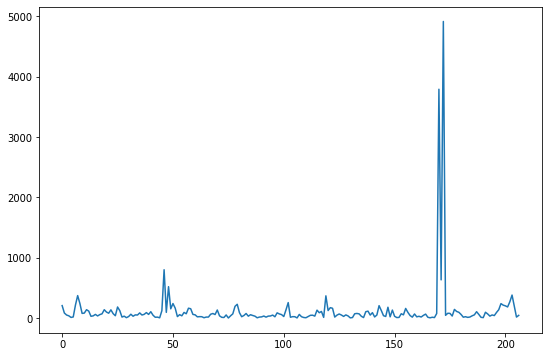

In [ ]:
JETRO['Click'].plot(figsize=(9, 6))
plt.show()

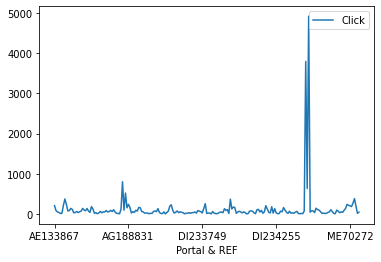

In [ ]:
JETRO.plot('Portal & REF','Click')

In [ ]:
Jetro.index

Index(['AE133867', 'AE133867', 'AE162535', 'AE162535', 'AE162535', 'AE162535',
       'AE167235', 'AE167235', 'AE167235', 'AE167235',
       ...
       'ME70272', 'ME70272', 'ME70272', 'ME70272', 'NE199051', 'NE199051',
       'NE199051', 'NE199051', 'NE47368', 'NE47368'],
      dtype='object', name='Portal & REF', length=207)

In [ ]:
plt.plot(Jetro['Portal & REF'], Jetro['Unique Visitor\nstand prospect'])

Visualisons AE133867

In [ ]:
Jetro.loc['AE133867']

,Portal,Ref fiche,Online since,Company name,Data collection date / per month,Month,URL statco,Online stand URL,Main category,Portal&MainCat,Number of product pages,View\ndisplay,Click,ADVERTISEMENT\nDisplay,ADVERTISEMENT\nClick,Sourcing & Website Traffic\nSearch Results page prospects,Sourcing & Website Traffic\nClick Throughs,Unique Visitor\nstand prospect,See\n Price Options/Where to Buy Prospects,Requests
Portal & REF,,,,,,,,,,,,,,,,,,,,
AE133867,AE,133867,2021-02-11,USTECH CORPORATION,2021-02-28,2,https://secure.archiexpo.com/statsco-backoffic...,https://www.archiexpo.com/prod/ustech-corporat...,Bathroom,AE-Bathroom,3,9810,205,2334,1,61,2,13,0,0
AE133867,AE,133867,2021-02-11,USTECH CORPORATION,2021-03-16,3,https://secure.archiexpo.com/statsco-backoffic...,https://www.archiexpo.com/prod/ustech-corporat...,Bathroom,AE-Bathroom,3,2825,82,5684,13,57,3,6,0,0


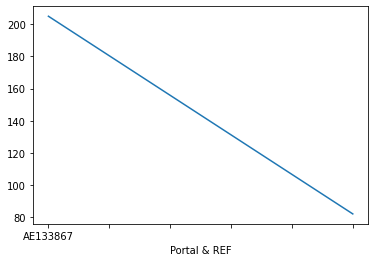

In [ ]:
Jetro.loc['AE133867','Click'].plot()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


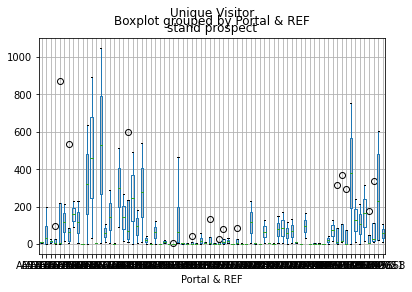

In [ ]:
Jetro.boxplot(column="Unique Visitor\nstand prospect",by="Portal & REF")

In [ ]:
Jetro.hist(column="Unique Visitor\nstand prospect",by="Portal & REF")

#LES TOPS

In [ ]:
Jetro.sort_values(by=['Unique Visitor\nstand prospect']).head(5)

,Portal,Ref fiche,Online since,Company name,Data collection date / per month,Month,URL statco,Online stand URL,Main category,Portal&MainCat,Number of product pages,View\ndisplay,Click,ADVERTISEMENT\nDisplay,ADVERTISEMENT\nClick,Sourcing & Website Traffic\nSearch Results page prospects,Sourcing & Website Traffic\nClick Throughs,Unique Visitor\nstand prospect,See\n Price Options/Where to Buy Prospects,Requests
Portal & REF,,,,,,,,,,,,,,,,,,,,
AE167299,AE,167299,2020-12-01,nagasawa mfg,2020-12-31,12,https://secure.archiexpo.com/statsco-backoffic...,https://www.archiexpo.com/prod/nagasawa-manufa...,"Doors, Garage doors, Gates","AE-Doors, Garage doors, Gates",1,1814,35,5019,9,13,4,0,0,0
ME131320,ME,131320,2020-12-01,nagasawa mfg,2020-12-31,12,https://secure.medicalexpo.com/statsco-backoff...,https://www.medicalexpo.com/prod/nagasawa-manu...,Hospital infrastructure,ME-Hospital infrastructure,1,191,13,964,2,2,0,0,0,0
DI233379,DI,233379,2021-02-11,"ULVAC, Inc.",2021-02-28,2,https://secure.directindustry.com/statsco-back...,https://www.directindustry.com/prod/ulvac-inc-...,Pumps,DI-Pumps,3,1060,36,1261,7,4,0,0,0,0
DI234227,DI,234227,2021-02-11,Kumahira,2021-02-28,2,https://secure.directindustry.com/statsco-back...,https://www.directindustry.com/prod/kumahira-2...,Industrial Building Equipment,DI-Industrial Building Equipment,18,1346,7,1485,0,18,0,0,0,0
DI234259,DI,234259,2021-02-11,Pi Photonics,2021-03-16,3,https://secure.directindustry.com/statsco-back...,https://www.directindustry.com/prod/pi-photoni...,Industrial Building Equipment,DI-Industrial Building Equipment,6,812,14,1498,1,12,1,0,0,0


#PIVOT

In [ ]:
df_pivot = pd.pivot_table(Jetro, index=['Portal & REF'], columns = ['Month'],values=['Unique Visitor\nstand prospect'], fill_value=0)
df_pivot

Unique Visitor\nstand prospect               
Month                                    1    2    3    12
Portal & REF                                              
AE133867                                  0   13    6    0
AE162535                                 64    1  195    0
AE167235                                 28   14    4   15
AE167236                                 96    7    6    0
AE167299                                  5    2  869    0
...                                     ...  ...  ...  ...
ME205006                                  0   18  314    0
ME68996                                   6    3  178    4
ME70272                                  36   20  339    8
NE199051                                 22  603   21  440
NE47368                                   0  105    9    0

[76 rows x 4 columns]

In [ ]:
df_pivot.head()

Unique Visitor\nstand prospect             
Month                                    1   2    3   12
Portal & REF                                            
AE133867                                  0  13    6   0
AE162535                                 64   1  195   0
AE167235                                 28  14    4  15
AE167236                                 96   7    6   0
AE167299                                  5   2  869   0

In [ ]:
df_pivot.columns.values

array([('Unique Visitor\nstand prospect', 1),
       ('Unique Visitor\nstand prospect', 2),
       ('Unique Visitor\nstand prospect', 3),
       ('Unique Visitor\nstand prospect', 12)], dtype=object)

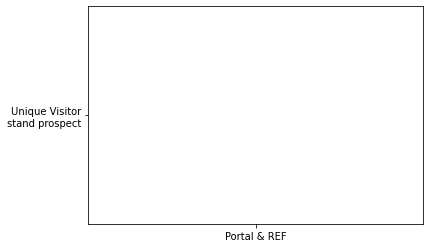

In [ ]:
plt.plot(['Portal & REF'],['Unique Visitor\nstand prospect'] , label="line L") #on se rapproche

In [ ]:
import pandas as pd
import plotly.express as px
fig = px.line(df_pivot, ('Unique Visitor\nstand prospect', 1), ('Unique Visitor\nstand prospect', 2), title='Tentative ')
fig.show()

#PieChart


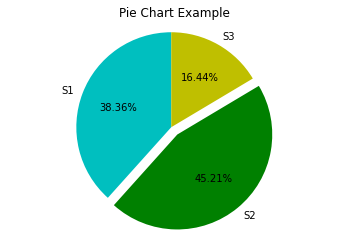

In [ ]:
labels = 'S1', 'S2', 'S3'
sections = [56, 66, 24]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1, 0),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('Pie Chart Example')
plt.show()

#Fin 

In [ ]:
Jetro.sort_values(by=['Portal & REF']).head(5)

,Portal,Ref fiche,Online since,Company name,Data collection date / per month,Month,URL statco,Online stand URL,Main category,Portal&MainCat,Number of product pages,View\ndisplay,Click,ADVERTISEMENT\nDisplay,ADVERTISEMENT\nClick,Sourcing & Website Traffic\nSearch Results page prospects,Sourcing & Website Traffic\nClick Throughs,Unique Visitor\nstand prospect,See\n Price Options/Where to Buy Prospects,Requests
Portal & REF,,,,,,,,,,,,,,,,,,,,
AE133867,AE,133867,2021-02-11,USTECH CORPORATION,2021-02-28,2,https://secure.archiexpo.com/statsco-backoffic...,https://www.archiexpo.com/prod/ustech-corporat...,Bathroom,AE-Bathroom,3,9810,205,2334,1,61,2,13,0,0
AE133867,AE,133867,2021-02-11,USTECH CORPORATION,2021-03-16,3,https://secure.archiexpo.com/statsco-backoffic...,https://www.archiexpo.com/prod/ustech-corporat...,Bathroom,AE-Bathroom,3,2825,82,5684,13,57,3,6,0,0
AE162535,AE,162535,2020-12-01,O.N. Industries Ltd.,2020-12-31,12,https://secure.archiexpo.com/statsco-backoffic...,https://www.archiexpo.com/prod/industries-ltd-...,Planting and accessories,AE-Planting and accessories,2,8183,49,1972,3,0,2,0,0,0
AE162535,AE,162535,2020-12-01,O.N. Industries Ltd.,2021-01-31,1,https://secure.archiexpo.com/statsco-backoffic...,https://www.archiexpo.com/prod/industries-ltd-...,Planting and accessories,AE-Planting and accessories,2,7735,36,4119,7,3,4,64,3,1
AE162535,AE,162535,2020-12-01,O.N. Industries Ltd.,2021-02-28,2,https://secure.archiexpo.com/statsco-backoffic...,https://www.archiexpo.com/prod/industries-ltd-...,Planting and accessories,AE-Planting and accessories,2,170,9,3504,6,0,2,1,0,0


#Correlation

In [ ]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.347533,0.398948,0.455743,0.072914,-0.233402,-0.731222,0.477978,-0.442621,0.015185
1,0.347533,1.000000,-0.284056,0.571003,-0.285483,0.382480,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1.000000,-0.523649,0.152937,-0.139176,-0.092895,0.016266,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1.000000,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.446650
4,0.072914,-0.285483,0.152937,-0.225343,1.000000,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.382480,-0.139176,-0.227577,-0.104438,1.000000,-0.030252,0.417640,0.205851,0.095084
6,-0.731222,-0.362842,-0.092895,-0.481548,-0.147477,-0.030252,1.000000,-0.494440,0.381407,-0.353652
7,0.477978,0.642578,0.016266,0.473286,-0.523283,0.417640,-0.494440,1.000000,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1.000000,0.150421
9,0.015185,0.190047,-0.383585,0.446650,-0.189916,0.095084,-0.353652,0.417863,0.150421,1.000000


# SEABORN


### Pariplot(): une vue d'ensemble

In [ ]:
sns.pairplot(data,hue='Click')